## Linear Regression

In [23]:
class MeraLR:
    def __init__(self):
        self.m = None
        self.b = None
    def fit(self,X_train,y_train):
        num=0
        den=0
        for i in range(X_train.shape[0]):
            num+= ((X_train[i]-X_train.mean())*(y_train[i]-y_train.mean()))
            den+= ((X_train[i]-X_train.mean())**2)
        self.m = num/den
        self.b = y_train.mean()-(self.m*X_train.mean())
        print("m(slope)= ",self.m)
        print("b(intercept)= ",self.b)
        

    
    def predict(self,X_test):
        return self.m * X_test + self.b



# can use X and y instead of X_train and y_train

In [91]:
import numpy as np
import pandas as pd

In [115]:
df=pd.read_csv('gold.csv')
df.head()

,Year,Price(24 karat per 10 grams)
0,2022,52950
1,2021,50045
2,2020,48651
3,2019,35220
4,2018,31438


In [26]:
X=df.iloc[:,0].values
y=df.iloc[:,1].values

In [27]:
X

array([2022, 2021, 2020, 2019, 2018, 2017, 2016, 2015, 2014, 2013, 2012,
       2011, 2010, 2009, 2008, 2007, 2006, 2005, 2004, 2003, 2002, 2001,
       2000, 1999, 1998, 1997, 1996, 1995, 1994, 1993, 1992, 1991, 1990,
       1989, 1988, 1987, 1986, 1985, 1984, 1983, 1982, 1981, 1980, 1979,
       1978, 1977, 1976, 1975, 1974, 1973, 1972, 1971, 1970, 1969, 1968,
       1967, 1966, 1965], dtype=int64)

In [28]:
y

array([52950, 50045, 48651, 35220, 31438, 29667, 28623, 26343, 28006,
       29600, 31050, 26400, 18500, 14500, 12500, 10800,  8400,  7000,
        5850,  5600,  4990,  4300,  4400,  4234,  4045,  4725,  5160,
        4680,  4598,  4140,  4334,  3466,  3200,  3140,  3130,  2570,
        2140,  2130,  1970,  1800,  1645,  1800,  1330,   937,   685,
         486,   432,   540,   506,   279,   202,   193,   184,   176,
         162,   103,    84,    72], dtype=int64)

In [29]:
# from sklearn.model_selection import train_test_split
# X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)
#  we'll code this from scratch :)

In [65]:
test_size = 0.2
 
total_rows = df.shape[0]
test_size_count = int(total_rows*test_size)
train_size_count = int(total_rows-test_size_count)
 
# Split data into test and train
X_train = df[0:train_size_count-1]
X_test = df[train_size_count:]

y_train = y[0:train_size_count-1]
y_test = y[train_size_count:]



In [63]:
X_train.shape

(46, 2)

In [62]:
X_test.shape

(11, 2)

In [66]:
y_train.shape

(46,)

In [67]:
y_test.shape

(11,)

In [54]:
df.shape

(58, 2)

In [30]:
X.shape

(58,)

In [31]:
y.shape

(58,)

In [32]:
X_train.shape

(46,)

In [33]:
model=MeraLR()

In [34]:
model.fit(X_train,y_train)

m(slope)=  615.1388231856635
b(intercept)=  -1216915.662434606


In [35]:
X_train.shape[0]

46

In [1]:
X_train.mean()

NameError: name 'X_train' is not defined

In [37]:
X_test[0]

1967

In [38]:
y_pred = model.predict(X_test[0])
print(y_pred)
# same as that obtained by scikit-learn

-6937.597228405997


### using scikit-learn

In [71]:
from sklearn.linear_model import LinearRegression

In [72]:
lr=LinearRegression()

In [81]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [42]:
lr.fit(X_train,y_train)

ValueError: Expected 2D array, got 1D array instead:
array=[2013 2012 2009 1995 1968 1986 1974 2005 1966 1990 1971 2010 1970 1981
 2006 2020 1997 2003 2016 2008 1973 1998 2017 1984 1989 2018 2019 1983
 1985 2002 1996 1976 2001 1972 1991 1988 2015 1965 2011 2004 1979 2000
 2014 1977 2007 1982].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [86]:
# Before experiencing this error, I never knew that we need 2D array to get sklearn work.
# Let's debug the error. The error says it expected 2D array but got 1D 
# array instead. The shape of X gave an output of (10,) which is clearly a 1D array.
# We used X = df[“X”] to get the X variable. This is generating a series with a 
# shape of (10,) without any columns.
# There were many ways to get a 2D array assigned to X. Let's see a few of them
# Option 1 - Reshaping to (-1,1)
X_train = np.array(X_train).reshape(-1,1)
#Option 2 - Getting as a dataframe
# X = df.iloc[:, :-1].values
# #Option 3 - Getting as a dataframe
# X = df[["X"]]
X_test= np.array(X_test).reshape(-1,1)

y_test= np.array(y_test).reshape(-1,1)


In [87]:
lr.fit(X_train,y_train)

LinearRegression()

In [45]:
df.columns

Index(['Year', 'Price(24 karat per 10 grams)'], dtype='object')

Text(0, 0.5, 'Price(24 karat per 10 grams)')

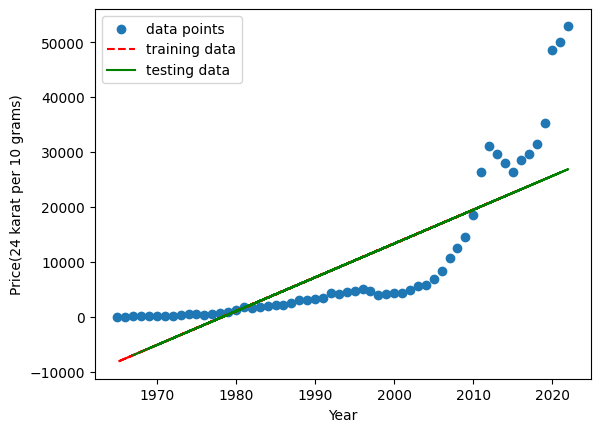

In [121]:
import matplotlib.pyplot as plt
plt.scatter(df['Year'],df['Price(24 karat per 10 grams)'],label='data points')
plt.plot(X_train,lr.predict(X_train),color='red',linestyle='--',label='training data')
plt.plot(X_test,lr.predict(X_test),color='green',label='testing data') #just exploring, not required
# plt.plot(X_train,y_train,color='pink',label='just exploring hehe')
# plt.plot(X_test, model.predict(X_test),color='black',label='ooo')

plt.xlabel('Year')
plt.legend()
plt.ylabel('Price(24 karat per 10 grams)')

In [50]:
m = lr.coef_

In [51]:
b = lr.intercept_

In [52]:
# y=mx+b
print("m(slope)= ",m)
print("b(intercept)= ",b)
# results are same as obtained above using intuitive method

m(slope)=  [615.13882319]
b(intercept)=  -1216915.6624346052


In [77]:
predictions=lr.predict(X_test)
print(predictions)

[-6937.59722841  9056.01217442  5365.17923531  -171.07017336
 12746.84511354 -2016.48664292  9671.15099761 26895.03804681
  8440.87335124 26279.89922362 -5707.31958203  1059.20747301]


## Regression Metrics

In [ ]:
#MAE - robust to outliers, limitation- not differentiable 
#MSE - not robust to outliers, differentiable
#RMSE - not that robust to outliers, differentiable
#R2 score - (1-(SSR/SSM)) not dependent on the context of the data
#Adjusted R2 score - 1-[(1-R2)(n-1)/(n-1-k)]   n= no. of rows   and k= no. of cols

In [78]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [99]:
y_pred=lr.predict(X_test)
y_pred

array([-6937.59722841,  9056.01217442,  5365.17923531,  -171.07017336,
       12746.84511354, -2016.48664292,  9671.15099761, 26895.03804681,
        8440.87335124, 26279.89922362, -5707.31958203,  1059.20747301])

In [96]:
y_test

array([[  103],
       [ 4140],
       [ 2570],
       [  685],
       [ 4234],
       [  540],
       [ 4598],
       [52950],
       [ 4334],
       [50045],
       [  176],
       [ 1330]], dtype=int64)

In [98]:
print("MAE: ",mean_absolute_error(y_test,y_pred))

MAE:  7652.615812949855


In [100]:
print("MSE: ",mean_squared_error(y_test,y_pred))

MSE:  123518194.08099508


In [102]:
print("RMSE: ",np.sqrt(mean_squared_error(y_test,y_pred)))

RMSE:  11113.87394570386


In [107]:
r2=r2_score(y_test,y_pred)
print("R2 score: ",r2_score(y_test,y_pred))

R2 score:  0.6363154193863095


In [111]:
X_test.shape

(12, 1)

In [112]:
# Adjustable r2 score
1-((1-r2)*(int(X_test.shape[0])-1)/(int(X_test.shape[0])-1-1))
# 1-((1-r2)*(int(X_test.shape)-1)/(int(X_test.shape)-1-1))


0.5999469613249404

In [119]:
new_df1= df.copy()
new_df1['random_feature']=np.random.random(58)

new_df1=new_df1[['Year','random_feature','Price(24 karat per 10 grams)']]
new_df1.head()

,Year,random_feature,Price(24 karat per 10 grams)
0,2022,0.259349,52950
1,2021,0.522850,50045
2,2020,0.394448,48651
3,2019,0.053753,35220
4,2018,0.914746,31438


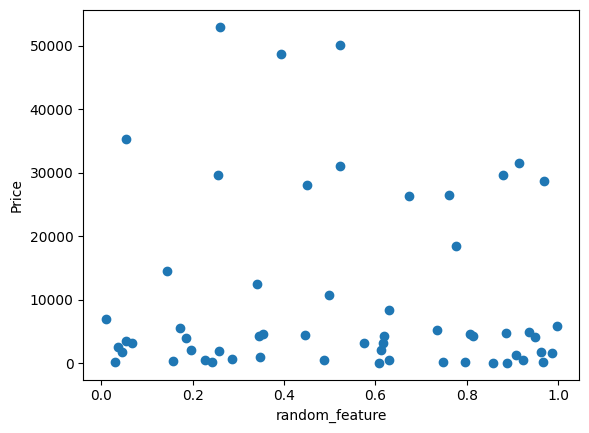

In [123]:
plt.scatter(new_df1['random_feature'], new_df1['Price(24 karat per 10 grams)'])
plt.xlabel('random_feature')
plt.ylabel('Price')
plt.show()

In [124]:
X = new_df1.iloc[:,0:2]
y = new_df1.iloc[:,-1]

In [125]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [126]:
lr=LinearRegression()

In [127]:
lr.fit(X_train,y_train)

LinearRegression()

In [128]:
y_pred=lr.predict(X_test)

In [129]:
print("R2 score: ",r2_score(y_test,y_pred))
r2=r2_score(y_test,y_pred)
# less than the previous r2 score( coz it's a random feature)  but it should be more

R2 score:  0.6268658619222263


In [130]:
1-((1-r2)*(int(X_test.shape[0])-1)/(int(X_test.shape[0])-1-1))
# less than previous adjustable r2 score but it should be more

0.5895524481144488

In [ ]:
# try adding a feature on which target value may depend and analyse the r2 score